## フーリエ変換を用いたハイパス

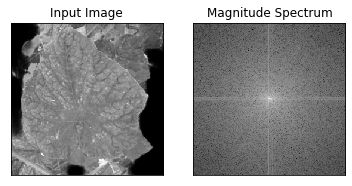

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../datasets/good_condition/MYSV/000005.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(256, 256)
128
128


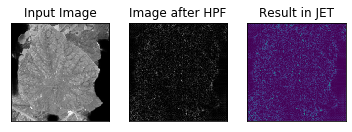

In [11]:
rows, cols = img.shape
print(img.shape)
crow,ccol = rows//2 , cols//2
print(crow)
print(ccol)
fshift[crow-55:crow+55, ccol-55:ccol+55] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

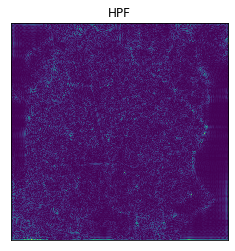

In [12]:
plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.imshow(img_back)

## ラプラシアンマスクを用いたハイパス

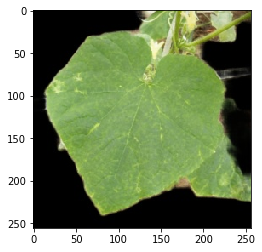

In [57]:
img = cv2.imread('../datasets/good_condition/MYSV/000001.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

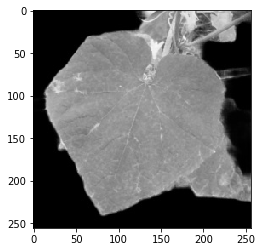

In [58]:
img = cv2.imread('../datasets/good_condition/MYSV/000001.jpg',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

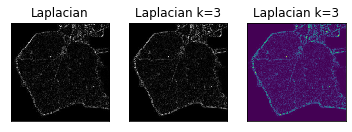

In [85]:
lap = cv2.Laplacian(img, cv2.CV_32F)
lap5 = cv2.Laplacian(img, cv2.CV_32F,ksize=3)

plt.subplot(1,3,1),plt.imshow(abs(lap),cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(abs(lap5),cmap = 'gray')
plt.title('Laplacian k=3'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(abs(lap5))
plt.title('Laplacian k=3'), plt.xticks([]), plt.yticks([])
plt.show()

[[  0.   0.   0. ... 328.  80.  40.]
 [  0.   0.   0. ... 128. 182. 136.]
 [  0.   0.   0. ...  44.  94.  52.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


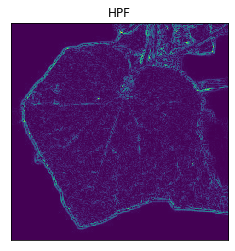

In [86]:
plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.imshow(abs(lap5))
print(abs(lap5))

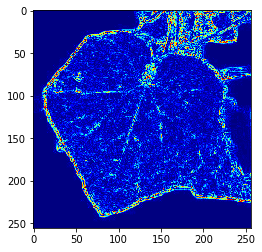

In [92]:
aaa = cv2.resize(abs(lap5), (256, 256))
aaa = cv2.applyColorMap(np.uint8(aaa), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(aaa, cv2.COLOR_BGR2RGB))

## 2値化（大津）

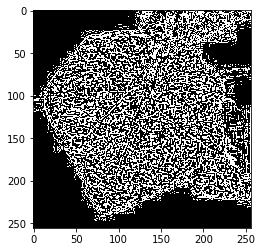

In [93]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(np.uint8(lap5),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(th2, cv2.COLOR_BGR2RGB))

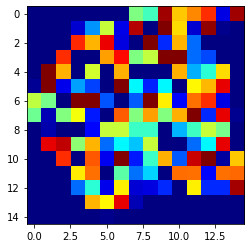

In [88]:
aaa = cv2.resize(th2, (15, 15))
aaa = cv2.applyColorMap(np.uint8(aaa), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(aaa, cv2.COLOR_BGR2RGB))

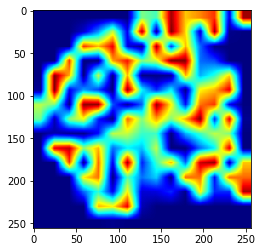

In [89]:
aaa = cv2.resize(th2, (15, 15))
aaa = cv2.resize(aaa, (256, 256))
aaa = cv2.applyColorMap(np.uint8(aaa), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(aaa, cv2.COLOR_BGR2RGB))

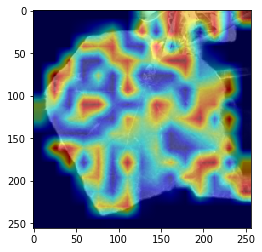

In [90]:
image = img - np.min(img)
image = np.minimum(image, 255)
cam_img = np.float32(aaa) + np.float32(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cam_img = 255 * cam_img / np.max(cam_img)
plt.imshow(cv2.cvtColor(cam_img / 255, cv2.COLOR_BGR2RGB))

## 2値化しないでそのまま

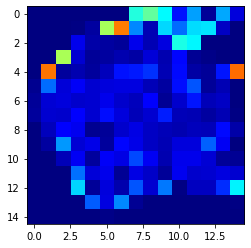

In [91]:
aaa = cv2.resize(abs(lap5), (15, 15))
aaa = cv2.applyColorMap(np.uint8(aaa), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(aaa, cv2.COLOR_BGR2RGB))

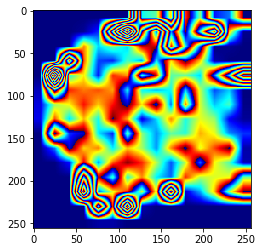

In [83]:
aaa = cv2.resize(abs(lap5), (15, 15))
aaa = cv2.resize(aaa, (256, 256))
aaa = cv2.applyColorMap(np.uint8(aaa), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(aaa, cv2.COLOR_BGR2RGB))

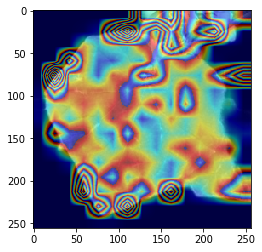

In [84]:
image = img - np.min(img)
image = np.minimum(image, 255)
cam_img = np.float32(aaa) + np.float32(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cam_img = 255 * cam_img / np.max(cam_img)
plt.imshow(cv2.cvtColor(cam_img / 255, cv2.COLOR_BGR2RGB))